In [663]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import scanpy as sc
import sklearn
from scipy.stats import pearsonr

In [664]:
import gseapy as gp

# Retrieve the list of available gene set libraries
libraries = gp.get_library_name()
print(libraries)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'COMPARTMENTS_Curated_2025', 'COMPARTMENTS_Experimental_2025', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_C

In [ ]:
RNA_data = sc.read_h5ad('../scButterfly/data/lymphoma/lymphoma_RNA.h5ad')
RNA_data
genes = list(RNA_data.var_names)
RNA_df = pd.DataFrame(RNA_data.X.toarray(), columns=genes)

/usr/local/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
trrust = pd.read_csv("../Benchmarking/data/trrust_rawdata.human.tsv", sep="\t", header=None)
trrust.columns = ["TF", "Target", "Regulation", "PMID"]
tftg = trrust[["TF", "Target"]].drop_duplicates()


In [ ]:
trrust

,TF,Target,Regulation,PMID
0,AATF,BAX,Repression,22909821
1,AATF,CDKN1A,Unknown,17157788
2,AATF,KLK3,Unknown,23146908
3,AATF,MYC,Activation,20549547
4,AATF,TP53,Unknown,17157788
...,...,...,...,...
9391,ZNF76,CDKN1A,Repression,15280358
9392,ZNF76,PCYT1A,Activation,14702349
9393,ZNF76,TALDO1,Unknown,14702349
9394,ZNRD1,ABCB1,Activation,16373708


In [ ]:
tftg_filtered = tftg[tftg["TF"].isin(genes) & tftg["Target"].isin(genes)].reset_index(drop=True)

In [ ]:
tftg_filtered

,TF,Target
0,AATF,BAX
1,AATF,CDKN1A
2,AATF,KLK3
3,AATF,MYC
4,AATF,TP53
...,...,...
8343,ZNF76,CDKN1A
8344,ZNF76,PCYT1A
8345,ZNF76,TALDO1
8346,ZNRD1,ABCB1


In [ ]:
def compute_tf_target_corr(pairs, expr_df, method="pearson"):
    correlations = []
    for _, row in pairs.iterrows():
        tf_expr = expr_df[row["TF"]]
        target_expr = expr_df[row["Target"]]
        if method == "pearson":
            r_value, p_value = pearsonr(tf_expr, target_expr)
        correlations.append((r_value, p_value))
    return pd.concat([pairs, pd.DataFrame(correlations, columns=["Correlation", "P-value"])], axis=1)

In [ ]:
corr = compute_tf_target_corr(tftg_filtered, RNA_df, method="pearson")

/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
corr

,TF,Target,Correlation,P-value
0,AATF,BAX,0.064453,5.839254e-15
1,AATF,CDKN1A,0.017179,3.762473e-02
2,AATF,KLK3,0.007489,3.648109e-01
3,AATF,MYC,0.063337,1.695127e-14
4,AATF,TP53,0.084531,1.218585e-24
...,...,...,...,...
8343,ZNF76,CDKN1A,0.010632,1.982477e-01
8344,ZNF76,PCYT1A,0.100810,2.154979e-34
8345,ZNF76,TALDO1,0.048268,5.093731e-09
8346,ZNRD1,ABCB1,0.045747,3.049790e-08


In [154]:
RNA_data[:, RNA_data.var['highly_variable']].write('/workspace/Benchmarking/data_scbutterfly/lymphoma_RNA_hv.h5ad')

In [188]:
RNA_data[:, RNA_data.var['highly_variable']].var_names 

Index(['LINC02593', 'SAMD11', 'SDF4', 'ACAP3', 'SSU72', 'CDK11B', 'PRDM16',
       'RPL22', 'ICMT', 'ESPN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=3000)

In [505]:
RNA_data = sc.read_h5ad('/workspace/scButterfly/data/lymphoma/lymphoma_RNA_pp.h5ad')
pd.Series(RNA_data.obs['Cell Types'].unique())

/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



0             Tumor B
1                   T
2           T cycling
3                Mono
4         low GEX mix
5     Tumor B cycling
6                   B
7          Mono/B mix
8             B/T mix
9          Mono/T mix
10        unknown mix
11                pDC
12      Stromal cells
13                NaN
14        Fibroblasts
dtype: category
Categories (14, object): [' B/T mix', 'B', 'Fibroblasts', 'Mono', ..., 'Tumor B cycling', 'low GEX mix', 'pDC', 'unknown mix']

In [553]:
RNA_data.obs['group'] = RNA_data.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_gsea = RNA_data[RNA_data.obs['group'].isin(['B','LYM'])].copy()

/opt/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning:

Variable names are not unique. To make them unique, call `.var_names_make_unique`.



In [507]:
data_gsea = data_gsea[:, data_gsea.var['highly_variable']]

In [554]:
sc.pp.log1p(data_gsea)

In [555]:
sc.tl.rank_genes_groups(
    data_gsea,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

In [556]:
de = sc.get.rank_genes_groups_df(data_gsea, group='LYM')
de['neg_log10_padj'] = -np.log10(de['pvals_adj'].replace(0, np.nan))

In [358]:
df = de.copy()

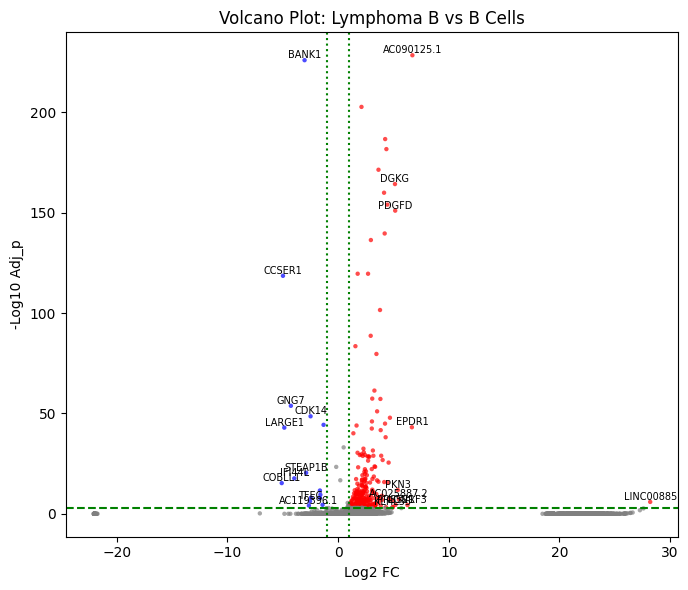

In [272]:
df['color'] = 'grey'
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.001), 'color'] = 'red'
df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.001), 'color'] = 'blue'

plt.figure(figsize=(7, 6))
plt.scatter(df['logfoldchanges'], df['neg_log10_padj'], s=10, alpha=0.7, c=df['color'], edgecolor='none')
plt.axhline(-np.log10(0.001), color='green', linestyle='--')
plt.axvline(1, color='green', linestyle='dotted')
plt.axvline(-1, color='green', linestyle='dotted')

sig_df = df[df['pvals_adj'] < 0.001]
top_up = sig_df.sort_values(by='logfoldchanges', ascending=False).head(10)
top_down = sig_df.sort_values(by='logfoldchanges', ascending=True).head(10)

for _, row in pd.concat([top_up, top_down]).iterrows():
    plt.text(row['logfoldchanges'], row['neg_log10_padj'],
             row['names'], fontsize=7, ha='center', va='bottom', color='black')

plt.xlabel('Log2 FC')
plt.ylabel('-Log10 Adj_p')
plt.title('Volcano Plot: Lymphoma B vs B Cells')
plt.tight_layout()
plt.show()

In [249]:
import plotly.express as px
import pandas as pd
import numpy as np

# Color logic
df['regulation'] = 'Not significant'
df.loc[(df['logfoldchanges'] > 1) & (df['pvals_adj'] < 0.05), 'regulation'] = 'Upregulated'
df.loc[(df['logfoldchanges'] < -1) & (df['pvals_adj'] < 0.05), 'regulation'] = 'Downregulated'

# Create interactive plot
fig = px.scatter(
    df,
    x='logfoldchanges',
    y='neg_log10_padj',
    color='regulation',
    hover_data=['names', 'logfoldchanges', 'pvals_adj'],
    color_discrete_map={
        'Upregulated': 'red',
        'Downregulated': 'blue',
        'Not significant': 'lightgray'
    },
    title='Interactive Volcano Plot',
    labels={
        'logfoldchanges': 'Log2 Fold Change',
        'neg_log10_padj': '-Log10 Adjusted P-Value'
    }
)

# Add text labels for top genes
for i, row in pd.concat([top_up, top_down]).iterrows():
    fig.add_annotation(
        x=row['logfoldchanges'],
        y=row['neg_log10_padj'],
        text=row['names'],
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-20,
        font=dict(size=10)
    )

fig.update_layout(
    template='simple_white',
    legend_title_text='Gene Regulation',
    hovermode='closest'
)

fig.show()


In [359]:
pre_rank = de[['names','logfoldchanges']].dropna()
pre_rank = pre_rank.set_index('names')['logfoldchanges'].sort_values(ascending=False)

In [360]:
pre_rank

names
LINC00885     28.199322
AC124254.2    27.587738
VASH2         27.266937
MYO3B         26.611078
AC106897.1    26.422716
                ...    
AL355053.1   -22.036936
AP000345.3   -22.037790
SERPINB2     -22.042740
LINC01756    -22.091923
AP001269.2   -22.091923
Name: logfoldchanges, Length: 3000, dtype: float32

In [361]:
gs_res = gp.prerank(
    rnk=pre_rank,
    gene_sets='MSigDB_Hallmark_2020',
    threads=4,
    permutation_num=100,      # reduce for speed, increase for robustness
    outdir=None,              # don’t write to disk
    seed=42,
)


2025-05-23 08:14:10,423 [WARNING] Duplicated values found in preranked stats: 6.93% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [362]:
gs_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,UV Response Dn,0.64578,1.122987,0.14,1.0,0.95,3/16,13.40%,TFPI;MMP16;COL11A1
1,prerank,Epithelial Mesenchymal Transition,0.560904,1.039006,0.29,1.0,1.0,11/46,19.23%,SFRP4;LAMA2;TNC;THBS1;COL5A3;PLOD2;DCN;CDH11;C...
2,prerank,Estrogen Response Early,0.582842,1.032519,0.45,1.0,1.0,5/21,15.30%,FOS;CLIC3;GFRA1;ELOVL2;TSKU
3,prerank,Estrogen Response Late,0.560772,1.025566,0.494949,1.0,1.0,8/22,30.27%,FOS;CD9;PKP3;CLIC3;PTGER3;FGFR3;TPBG;CYP4F11
4,prerank,Apical Junction,0.561704,1.00689,0.55,1.0,1.0,9/22,35.23%,VWF;NRXN2;PARVA;CNTN1;CDH11;COL16A1;ADRA1B;DSC...
5,prerank,Complement,-0.288255,-1.0,1.0,1.0,0.0,2/38,0.83%,SERPINB2;S100A12
6,prerank,Unfolded Protein Response,-0.385595,-1.0,1.0,1.0,0.0,15/15,61.67%,CCL2;EEF2;RPS14;PREB;POP4;NOP14;NOLC1;ATP6V0D1...
7,prerank,E2F Targets,-0.379704,-1.0,1.0,1.0,0.0,24/24,62.37%,RAN;TUBB;HMGB3;RPA2;PCNA;CDKN3;RFC2;CENPM;NOLC...
8,prerank,Interferon Gamma Response,-0.401819,-1.0,1.0,1.0,0.0,31/31,60.27%,IFI44L;BANK1;LY6E;DDX58;CCL2;CCL5;CXCL9;IFITM2...
9,prerank,Mitotic Spindle,-0.411607,-1.0,1.0,1.0,0.0,19/19,59.13%,SYNPO;ARHGDIA;MAP1S;UXT;TUBGCP6;TUBA4A;CENPF;K...


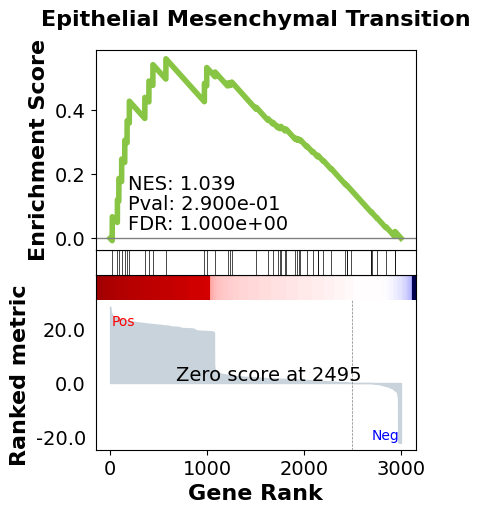

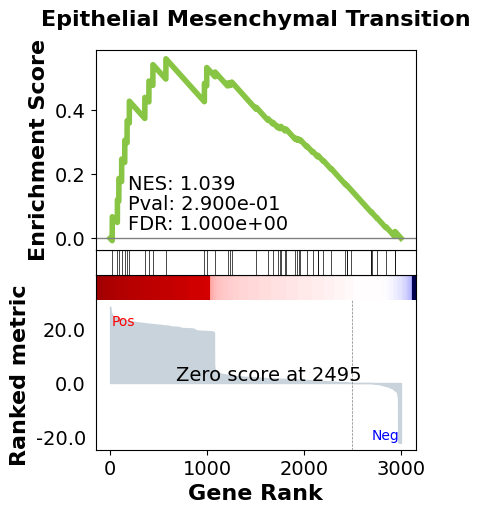

In [363]:
terms = gs_res.res2d.Term
gs_res.plot(terms=terms[1])

In [374]:
expr_df = pd.DataFrame(data_gsea.X.toarray().T, index=data_gsea.var_names, columns=data_gsea.obs_names)
phenotypes = data_gsea.obs['group'].values

In [375]:
gsea_result = gp.gsea(
    data=expr_df,
    gene_sets='MSigDB_Hallmark_2020',  # dict or path to .gmt
    cls=phenotypes,                # Array of class labels
    permutation_num=1000,
    method='signal_to_noise',      # or 't_test', 'log2_ratio_of_classes'
    outdir=None,          # Change or set to None
    no_plot=False,                  # Disable plots if not needed
    seed=42
)

2025-05-23 08:17:00,376 [WARNING] Found duplicated gene names, values averaged by gene names!
/opt/venv/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [376]:
gsea_result.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,mTORC1 Signaling,0.59834,2.567109,0.0,0.0,0.0,151/197,33.41%,TFRC;SLA;SKAP2;GSK3B;GCLC;EGLN3;ACACA;SERP1;CA...
1,gsea,PI3K/AKT/mTOR Signaling,0.608199,2.543099,0.0,0.0,0.0,64/104,25.35%,SLA;GSK3B;MAPKAP1;SMAD2;ACACA;MAP2K6;GRB2;ITPR...
2,gsea,G2-M Checkpoint,0.642003,2.531058,0.0,0.0,0.0,152/195,28.15%,MEIS2;TRA2B;SLC38A1;SMARCC1;DMD;EZH2;CUL4A;SS1...
3,gsea,Myc Targets V1,0.615857,2.529097,0.0,0.0,0.0,138/196,25.19%,TRA2B;GOT2;SMARCC1;HNRNPA2B1;FAM120A;RAD23B;CA...
4,gsea,Oxidative Phosphorylation,0.574842,2.501449,0.0,0.0,0.0,156/200,34.39%,OPA1;GOT2;PMPCA;ETFA;OGDH;SUCLA2;HSPA9;DLAT;AC...
5,gsea,Protein Secretion,0.646177,2.49285,0.0,0.0,0.0,70/94,24.62%,STAM;GOLGA4;ARFGEF2;COPB2;IGF2R;MON2;AP3S1;ARF...
6,gsea,TGF-beta Signaling,0.634984,2.491365,0.0,0.0,0.0,22/53,13.25%,BMPR2;BMPR1A;BCAR3;ARID4B;SKIL;CTNNB1;SMURF1;M...
7,gsea,DNA Repair,0.570657,2.489382,0.0,0.0,0.0,119/150,36.43%,NT5C3A;SNAPC4;HCLS1;EDF1;POLA1;RALA;POM121;NFX...
8,gsea,Mitotic Spindle,0.611754,2.484635,0.0,0.0,0.0,135/199,27.99%,CCDC88A;RABGAP1;ARHGEF7;FARP1;DLG1;RAPGEF5;ARH...
9,gsea,Unfolded Protein Response,0.594353,2.45421,0.0,0.0,0.0,82/108,33.03%,EIF4A2;CNOT4;TSPYL2;DDX10;DCP1A;SERP1;EIF4G1;P...


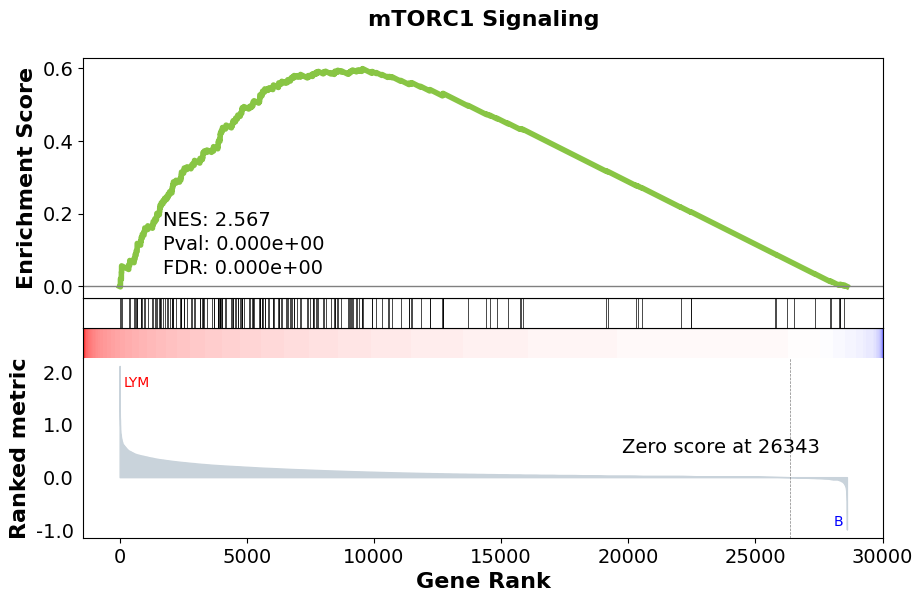

In [377]:
axs = gsea_result.plot(terms=gsea_result.res2d.Term[0], figsize=(10, 6))

In [564]:
RNA_data_pred = sc.read_h5ad('/workspace/scButterfly/data/lymphoma/predicted/pred_RNA_lymphoma2.h5ad')

In [565]:
RNA_data_pred.obs['group'] = RNA_data_pred.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_gsea_pred = RNA_data_pred[RNA_data_pred.obs['group'].isin(['B','LYM'])].copy()

In [393]:
expr_df_pred = pd.DataFrame(data_gsea_pred.X.toarray().T, index=data_gsea_pred.var_names, columns=data_gsea_pred.obs_names)
phenotypes_pred = data_gsea_pred.obs['group'].values

In [317]:
gsea_result_pred = gp.gsea(
    data=expr_df_pred,
    gene_sets='MSigDB_Hallmark_2020',  # dict or path to .gmt
    cls=phenotypes_pred,                # Array of class labels
    permutation_num=1000,
    method='signal_to_noise',      # or 't_test', 'log2_ratio_of_classes'
    outdir=None,          # Change or set to None
    no_plot=False,                  # Disable plots if not needed
    seed=42
)

/opt/venv/lib/python3.10/site-packages/gseapy/gsea.py:173: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [318]:
gsea_result_pred.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,TNF-alpha Signaling via NF-kB,0.490726,1.600101,0.03861,1.0,0.275,9/23,23.40%,BCL2A1;BCL6;CD83;TRAF1;SLC2A6;EHD1;DNAJB4;EGR2...
1,gsea,heme Metabolism,0.484645,1.493229,0.021782,0.98664,0.409,6/15,24.23%,MOCOS;NFE2L1;RHCE;MKRN1;TENT5C;ERMAP
2,gsea,IL-2/STAT5 Signaling,0.470569,1.432848,0.129666,0.898391,0.471,5/22,7.35%,RGS16;FAH;GPX4;CD83;TRAF1
3,gsea,DNA Repair,0.512383,1.42711,0.008032,0.691879,0.477,14/18,42.98%,EDF1;GPX4;SEC61A1;ADA;POLR2E;PDE6G;NME1;ELL;NE...
4,gsea,UV Response Up,0.445567,1.383994,0.070565,0.670792,0.519,13/16,48.79%,FMO1;TST;HYAL2;EPCAM;TUBA4A;ATF3;AP2S1;BID;HSP...
5,gsea,Adipogenesis,0.427288,1.357244,0.090559,0.635185,0.556,20/34,43.21%,ELOVL6;BCL6;FAH;GPX4;NKIRAS1;SQOR;TST;UCK1;ARA...
6,gsea,Mitotic Spindle,0.437596,1.294308,0.162745,0.706502,0.615,11/22,39.12%,TSC1;TUBGCP3;CEP131;SMC4;KPTN;CSNK1D;TUBA4A;RH...
7,gsea,KRAS Signaling Dn,0.435733,1.285167,0.218631,0.638006,0.618,4/15,16.05%,ARPP21;TENM2;KCNN1;TENT5C
8,gsea,Fatty Acid Metabolism,0.4389,1.237458,0.208502,0.672639,0.649,8/17,33.44%,GRHPR;PTPRG;FMO1;GSTZ1;SDHC;PRDX6;HCCS;HSD17B10
9,gsea,Unfolded Protein Response,0.434968,1.229926,0.204981,0.62246,0.651,15/19,53.35%,SERP1;SRPRB;EXOSC5;NOLC1;BAG3;ATP6V0D1;ATF3;BA...


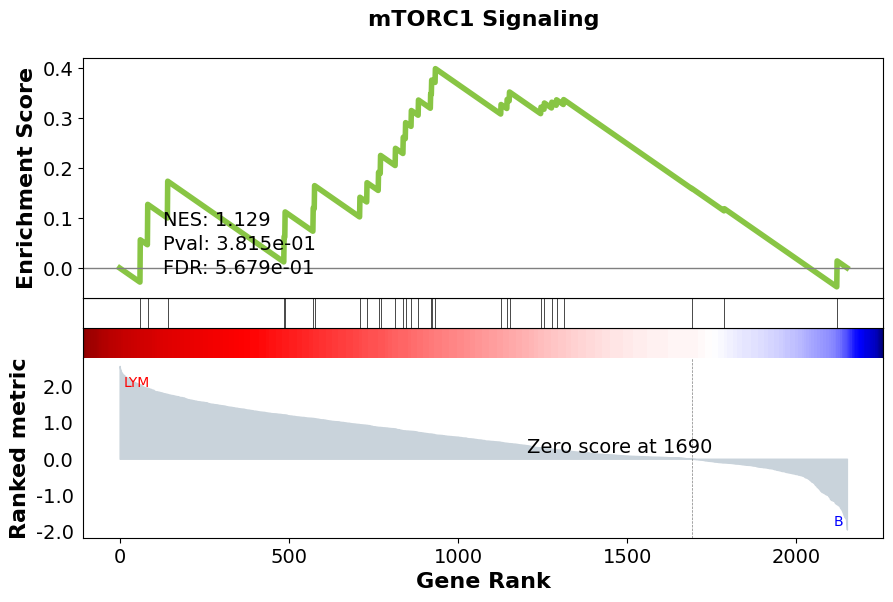

In [321]:
axs = gsea_result_pred.plot(terms=gsea_result_pred.res2d.Term[14], figsize=(10, 6))

In [557]:
data_gsea_hv = data_gsea[:, data_gsea.var['highly_variable']].copy()
expr_df_hv = pd.DataFrame(data_gsea_hv.X.toarray().T, index=data_gsea_hv.var_names, columns=data_gsea_hv.obs_names)

In [ ]:
gsea_result_hv = gp.gsea(
    data=expr_df_hv,
    gene_sets='MSigDB_Hallmark_2020',  # dict or path to .gmt
    cls=phenotypes,                # Array of class labels
    permutation_num=1000,
    method='signal_to_noise',      # or 't_test', 'log2_ratio_of_classes'
    outdir=None,          # Change or set to None
    no_plot=False,                  # Disable plots if not needed
    seed=42
)

In [566]:
gsea_result_hv.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Oxidative Phosphorylation,0.648,2.588407,0.0,0.0,0.0,49/53,34.34%,MTX2;ATP5MF;ATP5MG;SDHC;SLC25A3;UQCRH;NDUFB2;C...
1,gsea,mTORC1 Signaling,0.667568,2.368112,0.0,0.0,0.0,24/29,24.64%,ELOVL6;PPIA;NAMPT;ENO1;PSMB5;PSMA4;MAP2K3;TXNR...
2,gsea,Complement,0.54117,2.281324,0.0,0.0,0.0,15/38,25.10%,DGKG;CTSH;LYN;CDK5R1;EHD1;ATOX1;CASP9;PCLO;SH2...
3,gsea,TNF-alpha Signaling via NF-kB,0.57459,2.262544,0.0,0.0,0.0,15/35,21.83%,CD83;RELB;EHD1;ICAM1;NAMPT;SOD2;SLC2A6;MAP2K3;...
4,gsea,Glycolysis,0.606231,2.206923,0.0,0.0,0.0,13/24,19.94%,BIK;COG2;PPIA;AKR1A1;ENO1;SDHC;B4GALT2;LDHA;ST...
5,gsea,E2F Targets,0.665838,2.116731,0.0,0.000601,0.002,17/24,18.59%,NCAPD2;TOP2A;WDR90;DIAPH3;MKI67;MTHFD2;CENPE;S...
6,gsea,Fatty Acid Metabolism,0.628284,2.10482,0.0,0.000515,0.002,11/22,19.94%,GRHPR;PTPRG;HSPH1;SDHC;HSP90AA1;PRDX6;LDHA;ERP...
7,gsea,G2-M Checkpoint,0.712498,2.10338,0.0,0.00045,0.002,14/19,18.31%,SMC2;TOP2A;MKI67;NCL;CENPE;HMGN2;STMN1;PLK4;RP...
8,gsea,Mitotic Spindle,0.650956,2.090186,0.0,0.000601,0.003,17/19,33.67%,CSNK1D;TUBGCP3;TSC1;KIF3B;TOP2A;CEP131;CENPE;T...
9,gsea,Apoptosis,0.569458,2.087503,0.0,0.000721,0.004,15/27,26.66%,LEF1;BIK;SOD2;CASP9;TOP2A;CD69;BID;IL18;ISG20;...


In [559]:
deg_list = de[(de["pvals_adj"] < 0.05) & (abs(de["logfoldchanges"]) > 1)]['names'].tolist()

In [521]:
len(deg_list)

6737

In [560]:
data_gsea.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'AC133551.1', 'AC136612.1', 'AC136616.1', 'AC136616.3', 'AC136616.2',
       'AC141272.1', 'AC023491.2', 'AC007325.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=36601)

In [561]:
enr = gp.enrichr(
    gene_list=deg_list,
    gene_sets='MSigDB_Hallmark_2020',  # or 'GO_Biological_Process_2021', 'Reactome_2022', etc.
    organism='Human',
    background=list(data_gsea.var_names),          
    outdir=None,     # optional
    cutoff=0.01                   # p-value cutoff
)

In [563]:
enr.results[enr.results['Adjusted P-value'] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Myc Targets V1,3.794943e-55,1.897471e-53,0,0,10.240206,1283.184988,HNRNPU;HNRNPR;PWP1;PHB2;UBE2L3;PSMD8;PSMD7;TRI...
1,MSigDB_Hallmark_2020,G2-M Checkpoint,5.213727e-45,1.303432e-43,0,0,8.051255,820.946509,JPT1;CCNT1;HNRNPU;ARID4A;MKI67;SMC4;SMC2;PTTG1...
2,MSigDB_Hallmark_2020,E2F Targets,8.498266e-39,1.416378e-37,0,0,6.783378,594.637434,JPT1;NUP107;MRE11;TFRC;CSE1L;CCP110;SMC6;MKI67...
3,MSigDB_Hallmark_2020,Oxidative Phosphorylation,2.302571e-37,2.878213e-36,0,0,6.478656,546.549911,ISCA1;MTRR;ACAA2;COX6A1;PHB2;MTRF1;MPC1;PMPCA;...
4,MSigDB_Hallmark_2020,mTORC1 Signaling,3.761405e-37,3.761405e-36,0,0,6.502293,545.352860,ERO1A;TES;TFRC;PITPNB;UBE2D3;ARPC5L;SLA;ENO1;F...
5,MSigDB_Hallmark_2020,Mitotic Spindle,1.818424e-34,1.515353e-33,0,0,6.033876,468.771326,SMC3;SMC4;UXT;PREX1;PPP4R2;KIF5B;CDC27;NUSAP1;...
6,MSigDB_Hallmark_2020,Protein Secretion,3.517998e-30,2.512855e-29,0,0,11.441893,775.985305,ARF1;CLTC;SNAP23;CLTA;RAB22A;RPS6KA3;GOLGA4;SC...
7,MSigDB_Hallmark_2020,DNA Repair,1.279545e-25,7.997158e-25,0,0,5.861499,335.970125,ARL6IP1;ELL;MPG;GTF2B;POLB;SEC61A1;GUK1;SNAPC4...
8,MSigDB_Hallmark_2020,Unfolded Protein Response,8.478605e-24,4.710336e-23,0,0,7.244169,384.842835,EIF4A2;ERO1A;FKBP14;EIF4A3;HERPUD1;EDC4;TATDN2...
9,MSigDB_Hallmark_2020,PI3K/AKT/mTOR Signaling,3.042117e-17,1.521058e-16,0,0,5.512328,209.641510,ATF1;GSK3B;ARF1;YWHAB;UBE2D3;CLTC;PTEN;PRKAG1;...


In [568]:
sc.tl.rank_genes_groups(
    data_gsea_hv,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)

In [569]:
de_hv = sc.get.rank_genes_groups_df(data_gsea_hv, group='LYM')
de_hv['neg_log10_padj'] = -np.log10(de_hv['pvals_adj'].replace(0, np.nan))

In [570]:
deg_list_hv = de_hv[(de_hv["pvals_adj"] < 0.05) & (abs(de_hv["logfoldchanges"]) > 1)]['names'].tolist()

In [571]:
enr_hv = gp.enrichr(
    gene_list=deg_list_hv,
    gene_sets='MSigDB_Hallmark_2020',  # or 'GO_Biological_Process_2021', 'Reactome_2022', etc.
    organism='Human',
    background=list(data_gsea_hv.var_names),          
    outdir=None,     # optional
    cutoff=0.01                   # p-value cutoff
)

In [572]:
enr_hv.results[enr_hv.results['Adjusted P-value'] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Oxidative Phosphorylation,1.853551e-08,8.897043e-07,0,0,5.327592,94.850199,SLC25A3;NDUFB8;COX4I1;NDUFB2;UQCR11;PHB2;COX7C...
1,MSigDB_Hallmark_2020,mTORC1 Signaling,6.284775e-08,1.508346e-06,0,0,8.348801,138.444420,MAP2K3;TPI1;TXNRD1;ELOVL6;ENO1;HSPE1;TUBA4A;SL...
2,MSigDB_Hallmark_2020,PI3K/AKT/mTOR Signaling,1.263027e-04,2.020843e-03,0,0,13.486772,121.068453,MAP2K3;MAPK10;CSNK2B;THEM4;RAC1;PDK1;PPP1CA
3,MSigDB_Hallmark_2020,E2F Targets,2.879841e-04,2.764647e-03,0,0,4.916212,40.079936,TOP2A;CENPE;DIAPH3;MTHFD2;RFC2;TUBB;STMN1;NOLC...
4,MSigDB_Hallmark_2020,Glycolysis,2.879841e-04,2.764647e-03,0,0,4.916212,40.079936,ISG20;LDHA;TPI1;BIK;STMN1;COG2;AKR1A1;SDHC;ENO...
5,MSigDB_Hallmark_2020,Fatty Acid Metabolism,5.953361e-04,4.156820e-03,0,0,4.832572,35.888540,GRHPR;LDHA;HSP90AA1;HSPH1;ACSL1;ERP29;SDHC;MIF...
6,MSigDB_Hallmark_2020,Myc Targets V1,7.080641e-04,4.156820e-03,0,0,3.601861,26.124211,SLC25A3;NCBP1;NOLC1;HSPE1;PHB2;ILF2;GNL3;LDHA;...
7,MSigDB_Hallmark_2020,Mitotic Spindle,7.794037e-04,4.156820e-03,0,0,5.211390,37.297818,UXT;TOP2A;CENPE;KIF3B;CEP131;CSNK1D;TSC1;TUBGC...
8,MSigDB_Hallmark_2020,G2-M Checkpoint,7.794037e-04,4.156820e-03,0,0,5.211390,37.297818,TOP2A;CENPE;NCL;STMN1;NOLC1;RPA2;MKI67;HMGN2;SMC2
9,MSigDB_Hallmark_2020,Interferon Gamma Response,9.982904e-04,4.791794e-03,0,0,3.669242,25.352504,ISG20;MTHFD2;BANK1;NAMPT;IRF5;CD69;SRI;SOD2;PS...


scButterfly (ORA)

In [573]:
sc.pp.log1p(data_gsea_pred)
sc.tl.rank_genes_groups(
    data_gsea_pred,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)
de_pred = sc.get.rank_genes_groups_df(data_gsea_pred, group='LYM')
de_pred['neg_log10_padj'] = -np.log10(de_pred['pvals_adj'].replace(0, np.nan))

In [574]:
deg_list_pred = de_pred[(de_pred["pvals_adj"] < 0.05) & (abs(de_pred["logfoldchanges"]) > 1)]['names'].tolist()

In [575]:
enr_pred = gp.enrichr(
    gene_list=deg_list_pred,
    gene_sets='MSigDB_Hallmark_2020',  # or 'GO_Biological_Process_2021', 'Reactome_2022', etc.
    organism='Human',
    background=list(data_gsea_pred.var_names),          
    outdir=None,     # optional
    cutoff=0.01                   # p-value cutoff
)

In [576]:
enr_pred.results[enr_pred.results['Adjusted P-value'] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,E2F Targets,0.000129,0.006329,0,0,4.193952,37.554352,PLK4;TOP2A;RNASEH2A;RFC2;PLK1;NOLC1;HMGB3;SMC4...


Babel (ORA)

In [580]:
RNA_data_pred_babel = sc.read_h5ad('/workspace/babel/mymodel/atac_rna_test_preds_pp.h5ad')

In [581]:
RNA_data_pred_babel.obs['group'] = RNA_data_pred_babel.obs['Cell Types'].map(
    lambda x: 'B' if x in ['B'] else ('LYM' if x in ['Tumor B', 'Tumor B cycling'] else None)
)
data_gsea_pred_babel = RNA_data_pred_babel[RNA_data_pred_babel.obs['group'].isin(['B','LYM'])].copy()

In [579]:
data_gsea_pred_babel = data_gsea_pred_babel[:, data_gsea_pred_babel.var['highly_variable']].copy()

In [582]:
sc.pp.log1p(data_gsea_pred_babel)
sc.tl.rank_genes_groups(
    data_gsea_pred_babel,
    groupby='group',
    groups=['LYM'],
    reference='B',
    method='wilcoxon',
    pts=True
)
de_pred_babel = sc.get.rank_genes_groups_df(data_gsea_pred_babel, group='LYM')
de_pred_babel['neg_log10_padj'] = -np.log10(de_pred_babel['pvals_adj'].replace(0, np.nan))

In [583]:
deg_list_pred_babel = de_pred_babel[(de_pred_babel["pvals_adj"] < 0.05) & (abs(de_pred_babel["logfoldchanges"]) > 1)]['names'].tolist()

In [584]:
enr_pred_babel = gp.enrichr(
    gene_list=deg_list_pred_babel,
    gene_sets='MSigDB_Hallmark_2020',  # or 'GO_Biological_Process_2021', 'Reactome_2022', etc.
    organism='Human',
    background=list(data_gsea_pred_babel.var_names),          
    outdir=None,     # optional
    cutoff=0.01                   # p-value cutoff
)

In [585]:
enr_pred_babel.results[enr_pred_babel.results['Adjusted P-value'] < 0.05]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Inflammatory Response,2.076072e-14,1.038036e-12,0,0,3.076681,96.933038,NPFFR2;IFITM1;CDKN1A;CXCL9;CSF1;TNFAIP6;AQP9;I...
1,MSigDB_Hallmark_2020,Interferon Gamma Response,4.109475e-13,1.027369e-11,0,0,2.895574,82.582673,IFITM3;LGALS3BP;CDKN1A;CXCL9;IFITM2;BTG1;EIF4E...
2,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,3.593442e-11,5.989071e-10,0,0,2.643403,63.572055,CDKN1A;BTG1;CD83;CSF2;CSF1;TNFAIP6;CD80;PLEK;T...
3,MSigDB_Hallmark_2020,Allograft Rejection,2.413297e-10,3.016622e-09,0,0,2.609590,57.789002,ITK;CXCL9;DYRK3;SPI1;CSF1;CD80;GPR65;NCF4;ITGB...
4,MSigDB_Hallmark_2020,Interferon Alpha Response,8.073943e-09,8.073943e-08,0,0,3.328978,62.034245,IFITM3;LGALS3BP;IFITM1;IFITM2;CSF1;IFI35;IFI30...
5,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,5.138258e-08,4.281882e-07,0,0,3.436862,57.684169,ACVRL1;CXCL9;CSF2;CSF1;CSF2RB;ACVR1B;TNF;PIK3R...
6,MSigDB_Hallmark_2020,Complement,3.473963e-07,2.481402e-06,0,0,2.149006,31.961733,FCN1;DGKG;DOCK4;SERPINA1;ITGAM;DYRK2;CPQ;PLEK;...
7,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,5.920946e-07,3.700591e-06,0,0,2.121198,30.417126,OXTR;SPARC;COL16A1;LAMC1;AREG;FGF2;MYLK;LOXL2;...
8,MSigDB_Hallmark_2020,KRAS Signaling Up,7.887934e-07,4.382186e-06,0,0,2.111680,29.674932,NRP1;SNAP25;SPON1;ADAMDEC1;PTPRR;MTMR10;PLVAP;...
9,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,1.599077e-06,7.995385e-06,0,0,2.057759,27.463027,IFITM3;CDKN1C;CYFIP1;NRP1;CD83;CSF2;GUCY1B1;CS...


In [586]:
# Get significant terms in both enr_pred_babel and enr
sig_terms_enr = set(enr.results[enr.results['Adjusted P-value'] < 0.05]['Term'])
sig_pred_babel = enr_pred_babel.results[enr_pred_babel.results['Adjusted P-value'] < 0.05]
sig_pred_babel[sig_pred_babel['Term'].isin(sig_terms_enr)]

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Inflammatory Response,2.076072e-14,1.038036e-12,0,0,3.076681,96.933038,NPFFR2;IFITM1;CDKN1A;CXCL9;CSF1;TNFAIP6;AQP9;I...
1,MSigDB_Hallmark_2020,Interferon Gamma Response,4.109475e-13,1.027369e-11,0,0,2.895574,82.582673,IFITM3;LGALS3BP;CDKN1A;CXCL9;IFITM2;BTG1;EIF4E...
2,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,3.593442e-11,5.989071e-10,0,0,2.643403,63.572055,CDKN1A;BTG1;CD83;CSF2;CSF1;TNFAIP6;CD80;PLEK;T...
3,MSigDB_Hallmark_2020,Allograft Rejection,2.413297e-10,3.016622e-09,0,0,2.609590,57.789002,ITK;CXCL9;DYRK3;SPI1;CSF1;CD80;GPR65;NCF4;ITGB...
4,MSigDB_Hallmark_2020,Interferon Alpha Response,8.073943e-09,8.073943e-08,0,0,3.328978,62.034245,IFITM3;LGALS3BP;IFITM1;IFITM2;CSF1;IFI35;IFI30...
5,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,5.138258e-08,4.281882e-07,0,0,3.436862,57.684169,ACVRL1;CXCL9;CSF2;CSF1;CSF2RB;ACVR1B;TNF;PIK3R...
6,MSigDB_Hallmark_2020,Complement,3.473963e-07,2.481402e-06,0,0,2.149006,31.961733,FCN1;DGKG;DOCK4;SERPINA1;ITGAM;DYRK2;CPQ;PLEK;...
8,MSigDB_Hallmark_2020,KRAS Signaling Up,7.887934e-07,4.382186e-06,0,0,2.111680,29.674932,NRP1;SNAP25;SPON1;ADAMDEC1;PTPRR;MTMR10;PLVAP;...
9,MSigDB_Hallmark_2020,IL-2/STAT5 Signaling,1.599077e-06,7.995385e-06,0,0,2.057759,27.463027,IFITM3;CDKN1C;CYFIP1;NRP1;CD83;CSF2;GUCY1B1;CS...
13,MSigDB_Hallmark_2020,Estrogen Response Early,5.038386e-05,1.799424e-04,0,0,1.842771,18.235762,LAD1;CLIC3;WWC1;FHL2;AREG;TSKU;RAPGEFL1;IGF1R;...


In [ ]:
set_genes_true = set(enr.results[enr.results['Adjusted P-value'] < 0.05]['Genes'][33].split(';'))
set_genes_pred = set(enr_pred_babel.results[enr_pred_babel.results['Adjusted P-value'] < 0.05]['Genes'][2].split(';'))

In [608]:
set(enr.results[enr.results['Adjusted P-value'] < 0.05]['Genes'][enr.results[enr.results['Adjusted P-value'] < 0.05]['Term'] == 'Inflammatory Response'].values[0].split(';'))

{'ABI1',
 'AHR',
 'ATP2A2',
 'ATP2C1',
 'BTG2',
 'CCR7',
 'CD40',
 'CD55',
 'CD69',
 'CD70',
 'CD82',
 'CYBB',
 'GABBR1',
 'GCH1',
 'GNAI3',
 'HIF1A',
 'ICAM1',
 'IFNAR1',
 'IFNGR2',
 'IL10RA',
 'IL15',
 'IL15RA',
 'IL18R1',
 'IL4R',
 'KIF1B',
 'LCK',
 'LTA',
 'LYN',
 'MSR1',
 'NAMPT',
 'NFKB1',
 'NFKBIA',
 'PDE4B',
 'PSEN1',
 'PTGER4',
 'PTPRE',
 'RAF1',
 'RELA',
 'RIPK2',
 'RNF144B',
 'SELENOS',
 'SELL',
 'SEMA4D',
 'SLAMF1',
 'SLC11A2',
 'SLC31A1',
 'SLC7A1',
 'SRI',
 'TNFRSF1B'}

In [ ]:
enr.results[enr.results['Adjusted P-value'] < 0.05]['Term'] == 'Inflammatory Response'

In [548]:
len(set_genes_pred)

90

In [549]:
overlap_count = len(set_genes_true & set_genes_pred)
percent_overlap = (overlap_count / len(set_genes_pred)) * 100

In [550]:
print(overlap_count, percent_overlap)

6 6.666666666666667


In [619]:
def compute_pathway_overlap(true_df, pred_df, pval_thresh=0.05):
    # Filter significant pathways
    sig_true = true_df[true_df['Adjusted P-value'] < pval_thresh]
    sig_pred = pred_df[pred_df['Adjusted P-value'] < pval_thresh]

    # Identify common enriched terms
    shared_terms = set(sig_true['Term']).intersection(sig_pred['Term'])

    dict = {}
    jaccards = 0.0
    for term in shared_terms:
        # Get gene sets for the term from both dataframes
        genes_true = set(sig_true[sig_true['Term'] == term]['Genes'].values[0].split(';'))
        genes_pred = set(sig_pred[sig_pred['Term'] == term]['Genes'].values[0].split(';'))

        # Compute Jaccard index (overlap)
        union = genes_true.union(genes_pred)
        if len(union) == 0:
            continue  # avoid division by zero
        jaccard = len(genes_true.intersection(genes_pred)) / len(union)
        jaccards += jaccard
        fp = len(genes_pred - genes_true)
        fn = len(genes_true - genes_pred)
        dict[term] = {
            'Jaccard': jaccard,
            'FP': fp,
            'FN': fn,
        }

    if jaccards > 0:
        return jaccards / len(dict.values()), dict 
    else:
        return 0.0  # or np.nan if you prefer


In [ ]:
compute_pathway_overlap(enr.results, enr_pred_babel.results)

(0.07555643863439812,
 {'Allograft Rejection': {'Jaccard': 0.07857142857142857, 'FP': 73, 'FN': 56},
  'Apical Junction': {'Jaccard': 0.06422018348623854, 'FP': 60, 'FN': 42},
  'KRAS Signaling Up': {'Jaccard': 0.048, 'FP': 70, 'FN': 49},
  'TNF-alpha Signaling via NF-kB': {'Jaccard': 0.04225352112676056,
   'FP': 84,
   'FN': 52},
  'TGF-beta Signaling': {'Jaccard': 0.09090909090909091, 'FP': 16, 'FN': 24},
  'Complement': {'Jaccard': 0.061068702290076333, 'FP': 70, 'FN': 53},
  'IL-2/STAT5 Signaling': {'Jaccard': 0.09302325581395349, 'FP': 64, 'FN': 53},
  'Hypoxia': {'Jaccard': 0.06306306306306306, 'FP': 53, 'FN': 51},
  'Interferon Alpha Response': {'Jaccard': 0.08108108108108109,
   'FP': 43,
   'FN': 25},
  'Interferon Gamma Response': {'Jaccard': 0.08176100628930817,
   'FP': 81,
   'FN': 65},
  'UV Response Dn': {'Jaccard': 0.08333333333333333, 'FP': 43, 'FN': 45},
  'IL-6/JAK/STAT3 Signaling': {'Jaccard': 0.09523809523809523,
   'FP': 36,
   'FN': 21},
  'Inflammatory Response